## <center> Visualization of Neural Networks

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries.We have an example that shows how it would be impossible for a linear classifier to separate between classes and demonstrate how a neural network can be used to solve this.

In [1]:
pip install tensorflow==2.14.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import utils

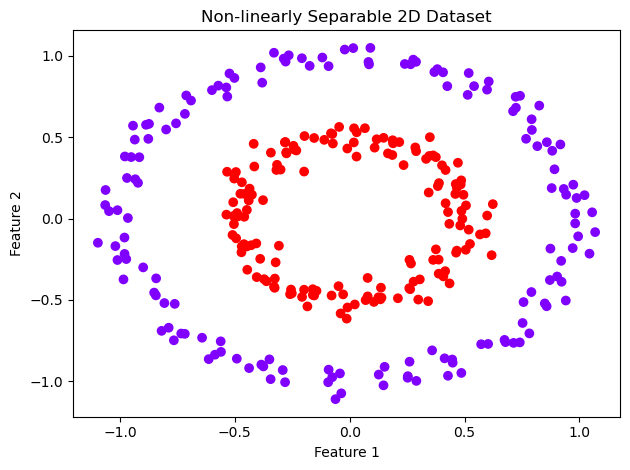

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles #using the dataset for visualization
import numpy as np

# Generating a non-linearly separable dataset
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Function to get consistent colors for plotting
def get_colors(y):
    # Map unique labels to colors
    unique_labels = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    color_map = {label: color for label, color in zip(unique_labels, colors)}
    return [color_map[label] for label in y]

cmap = get_colors(y)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=cmap)
plt.title("Non-linearly Separable 2D Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

In [4]:
    X

array([[-0.24183046,  0.42516296],
       [ 0.20976262, -0.48994789],
       [ 0.42792617,  0.04011244],
       [ 0.8816257 ,  0.41698355],
       [-0.47008918, -0.17129691],
       [-0.50576803,  0.01607921],
       [-0.19690914,  0.50749348],
       [-0.09380447, -1.00637942],
       [ 0.93184527,  0.18226342],
       [ 0.28550546,  0.43763665],
       [-0.40664959, -0.15272996],
       [-0.71742094,  0.64410026],
       [-0.42578857,  0.14708394],
       [-0.26539464,  1.00436644],
       [ 0.06622503,  0.55588968],
       [-0.44774192,  0.05318915],
       [ 0.46307834, -0.20945722],
       [-0.41526403,  0.32029147],
       [ 1.06836068, -0.08331252],
       [ 0.47105256,  0.34330276],
       [-0.98049989, -0.11652419],
       [-0.03668585, -1.0748191 ],
       [-0.25966226, -0.46496041],
       [-0.25198181, -0.45974584],
       [-0.43799687, -0.91941676],
       [-0.2081079 ,  0.98629719],
       [ 0.30517566, -0.3739772 ],
       [ 0.56709281, -0.0975283 ],
       [ 0.50613857,

In [5]:
y

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [6]:
#splitting thr dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

Building a Perceptron using Keras as an example since a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit. This perceptron is built with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [7]:
# Importing required libraries

from keras.models import Sequential 
# Keras refers to an architecture in which the outputs of \
#one layer are the inputs to the next as "Sequential"

from keras.layers import Dense
# "dense" connection between layers, where every input unit connects to a unit in the next layer

from tensorflow.keras.optimizers.legacy import SGD # SGD is the learning algorithm used

### Modeling Part 1

Creating a neural network with 1 layer

Each "input_dim" of each layer is the number units in the previous layer (in this case the input), and the number of "units" is the number of outputs of the layer (in this case it will be 1).

In [8]:

perceptron = Sequential()
perceptron.add(Dense(units= 1, input_dim= 2, activation = 'sigmoid'))

Now we specify how to optimize the neural network. Using stochastic gradient descent to compile the model. The loss function is "binary_crossentropy"

In [9]:
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)

In [10]:
#training the built perceptron with appropriate epochs and batch_size
perceptron.fit(X_train, y_train, batch_size= 32, epochs= 300)

Epoch 1/300
8/8 [==============================] - 0s 578us/step - loss: 0.7653
Epoch 2/300
8/8 [==============================] - 0s 437us/step - loss: 0.7649
Epoch 3/300
8/8 [==============================] - 0s 446us/step - loss: 0.7643
Epoch 4/300
8/8 [==============================] - 0s 581us/step - loss: 0.7635
Epoch 5/300
8/8 [==============================] - 0s 437us/step - loss: 0.7628
Epoch 6/300
8/8 [==============================] - 0s 472us/step - loss: 0.7620
Epoch 7/300
8/8 [==============================] - 0s 393us/step - loss: 0.7612
Epoch 8/300
8/8 [==============================] - 0s 376us/step - loss: 0.7604
Epoch 9/300
8/8 [==============================] - 0s 388us/step - loss: 0.7597
Epoch 10/300
8/8 [==============================] - 0s 561us/step - loss: 0.7590
Epoch 11/300
8/8 [==============================] - 0s 381us/step - loss: 0.7582
Epoch 12/300
8/8 [==============================] - 0s 341us/step - loss: 0.7575
Epoch 13/300
8/8 [===================

8/8 [==============================] - 0s 343us/step - loss: 0.7139
Epoch 103/300
8/8 [==============================] - 0s 320us/step - loss: 0.7136
Epoch 104/300
8/8 [==============================] - 0s 395us/step - loss: 0.7134
Epoch 105/300
8/8 [==============================] - 0s 458us/step - loss: 0.7130
Epoch 106/300
8/8 [==============================] - 0s 341us/step - loss: 0.7127
Epoch 107/300
8/8 [==============================] - 0s 352us/step - loss: 0.7125
Epoch 108/300
8/8 [==============================] - 0s 346us/step - loss: 0.7122
Epoch 109/300
8/8 [==============================] - 0s 398us/step - loss: 0.7120
Epoch 110/300
8/8 [==============================] - 0s 359us/step - loss: 0.7117
Epoch 111/300
8/8 [==============================] - 0s 343us/step - loss: 0.7115
Epoch 112/300
8/8 [==============================] - 0s 357us/step - loss: 0.7112
Epoch 113/300
8/8 [==============================] - 0s 353us/step - loss: 0.7110
Epoch 114/300
8/8 [===========

8/8 [==============================] - 0s 333us/step - loss: 0.6975
Epoch 203/300
8/8 [==============================] - 0s 329us/step - loss: 0.6974
Epoch 204/300
8/8 [==============================] - 0s 425us/step - loss: 0.6973
Epoch 205/300
8/8 [==============================] - 0s 477us/step - loss: 0.6973
Epoch 206/300
8/8 [==============================] - 0s 355us/step - loss: 0.6972
Epoch 207/300
8/8 [==============================] - 0s 386us/step - loss: 0.6971
Epoch 208/300
8/8 [==============================] - 0s 362us/step - loss: 0.6970
Epoch 209/300
8/8 [==============================] - 0s 344us/step - loss: 0.6970
Epoch 210/300
8/8 [==============================] - 0s 350us/step - loss: 0.6969
Epoch 211/300
8/8 [==============================] - 0s 343us/step - loss: 0.6968
Epoch 212/300
8/8 [==============================] - 0s 374us/step - loss: 0.6967
Epoch 213/300
8/8 [==============================] - 0s 355us/step - loss: 0.6966
Epoch 214/300
8/8 [===========

In [11]:
y_preds = perceptron.predict(X_test)
y_preds
y_preds = (y_preds > 0.5).astype("float64").reshape(-1)

2/2 [==============================] - 0s 832us/step


In [12]:
#Computing accuracy by implementing own built function
def accuracy(y, y_preds):
    y_pred_classes = (y_preds > 0.5).astype("int32")
    accuracy = np.mean(y == y_pred_classes)
    return accuracy


In [13]:
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

The accuracy is: 0.4166666666666667


57/57 [==============================] - 0s 273us/step


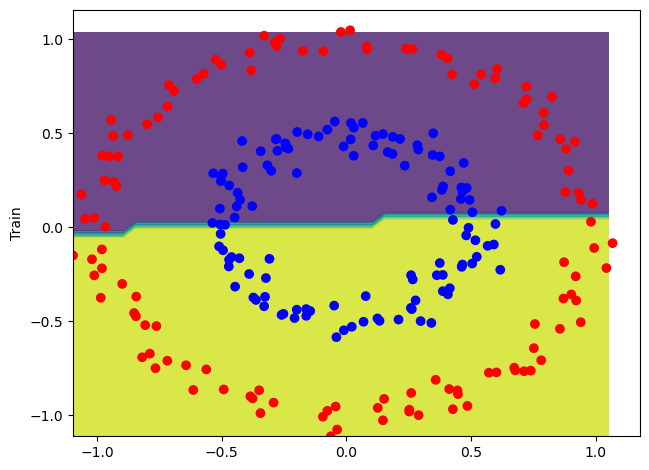

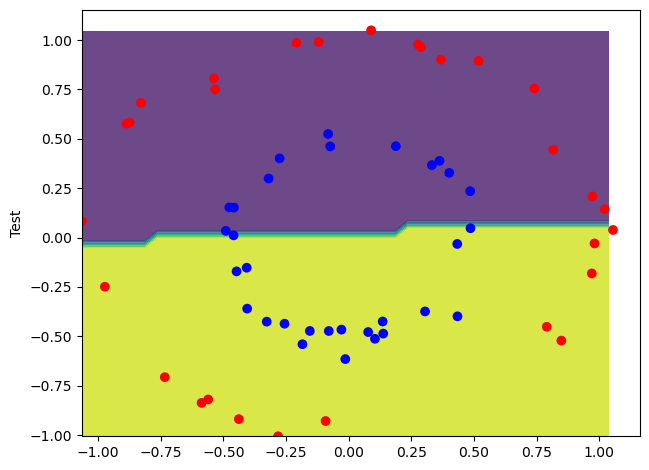

In [14]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")
plt.show()

Thus, the perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

### Modeling Part 2

Now, creating a 2-layer neural network by adding one hidden layer of 2 units and an output layer of 1 unit.
Use "relu" as the activation function for intermediate layers, and "sigmoid"for output layer.

In [15]:
def build_one_output_model():
    model = Sequential()

    # Adding a input hidden layer with 2 units
    model.add(Dense(units= 2, input_dim= 2, activation = 'relu'))

    # Adding a final output layer with 1 unit

    model.add(Dense(units= 1, activation = 'sigmoid'))

    # Specifying SGD optimizer with appropriate values in learning_rate, decay and momentum.
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent


    # compiling the model with "binary_crossentropy" loss and SGD optimizer.
    model.compile(loss="binary_crossentropy", optimizer=sgd)

    return model


In [16]:
model = build_one_output_model()

In [17]:
X_train.shape

(240, 2)

In [18]:
#Fitting the model by training set with appropriate epochs and batch_size.
model.fit(X_train, y_train, batch_size= 32, epochs= 300)

Epoch 1/300
8/8 [==============================] - 0s 683us/step - loss: 0.7727
Epoch 2/300
8/8 [==============================] - 0s 573us/step - loss: 0.7702
Epoch 3/300
8/8 [==============================] - 0s 603us/step - loss: 0.7667
Epoch 4/300
8/8 [==============================] - 0s 653us/step - loss: 0.7627
Epoch 5/300
8/8 [==============================] - 0s 586us/step - loss: 0.7592
Epoch 6/300
8/8 [==============================] - 0s 515us/step - loss: 0.7552
Epoch 7/300
8/8 [==============================] - 0s 456us/step - loss: 0.7519
Epoch 8/300
8/8 [==============================] - 0s 477us/step - loss: 0.7489
Epoch 9/300
8/8 [==============================] - 0s 459us/step - loss: 0.7457
Epoch 10/300
8/8 [==============================] - 0s 536us/step - loss: 0.7428
Epoch 11/300
8/8 [==============================] - 0s 469us/step - loss: 0.7402
Epoch 12/300
8/8 [==============================] - 0s 419us/step - loss: 0.7379
Epoch 13/300
8/8 [===================

8/8 [==============================] - 0s 354us/step - loss: 0.6717
Epoch 103/300
8/8 [==============================] - 0s 374us/step - loss: 0.6714
Epoch 104/300
8/8 [==============================] - 0s 363us/step - loss: 0.6711
Epoch 105/300
8/8 [==============================] - 0s 393us/step - loss: 0.6709
Epoch 106/300
8/8 [==============================] - 0s 367us/step - loss: 0.6705
Epoch 107/300
8/8 [==============================] - 0s 357us/step - loss: 0.6702
Epoch 108/300
8/8 [==============================] - 0s 362us/step - loss: 0.6700
Epoch 109/300
8/8 [==============================] - 0s 360us/step - loss: 0.6696
Epoch 110/300
8/8 [==============================] - 0s 393us/step - loss: 0.6694
Epoch 111/300
8/8 [==============================] - 0s 383us/step - loss: 0.6691
Epoch 112/300
8/8 [==============================] - 0s 351us/step - loss: 0.6688
Epoch 113/300
8/8 [==============================] - 0s 351us/step - loss: 0.6685
Epoch 114/300
8/8 [===========

8/8 [==============================] - 0s 377us/step - loss: 0.6444
Epoch 203/300
8/8 [==============================] - 0s 368us/step - loss: 0.6442
Epoch 204/300
8/8 [==============================] - 0s 371us/step - loss: 0.6441
Epoch 205/300
8/8 [==============================] - 0s 357us/step - loss: 0.6440
Epoch 206/300
8/8 [==============================] - 0s 373us/step - loss: 0.6438
Epoch 207/300
8/8 [==============================] - 0s 504us/step - loss: 0.6437
Epoch 208/300
8/8 [==============================] - 0s 363us/step - loss: 0.6435
Epoch 209/300
8/8 [==============================] - 0s 364us/step - loss: 0.6434
Epoch 210/300
8/8 [==============================] - 0s 355us/step - loss: 0.6433
Epoch 211/300
8/8 [==============================] - 0s 348us/step - loss: 0.6432
Epoch 212/300
8/8 [==============================] - 0s 364us/step - loss: 0.6430
Epoch 213/300
8/8 [==============================] - 0s 360us/step - loss: 0.6429
Epoch 214/300
8/8 [===========

In [19]:
#calculting the predictions
y_preds = model.predict(X_test)
y_preds
y_preds = (y_preds > 0.5).astype("float64").reshape(-1)

2/2 [==============================] - 0s 1ms/step


In [20]:

def accuracy(y, y_preds):
    y_pred_classes = (y_preds > 0.5).astype("int32")
    accuracy = np.mean(y == y_pred_classes)
    return accuracy



In [21]:
 print(f'The accuracy is: {accuracy(y_test, y_preds)}')

The accuracy is: 0.43333333333333335


57/57 [==============================] - 0s 537us/step


Text(22.097222222222214, 0.5, 'Test')

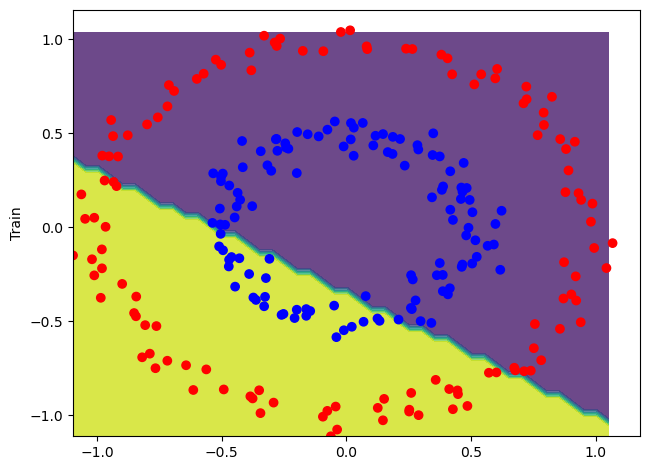

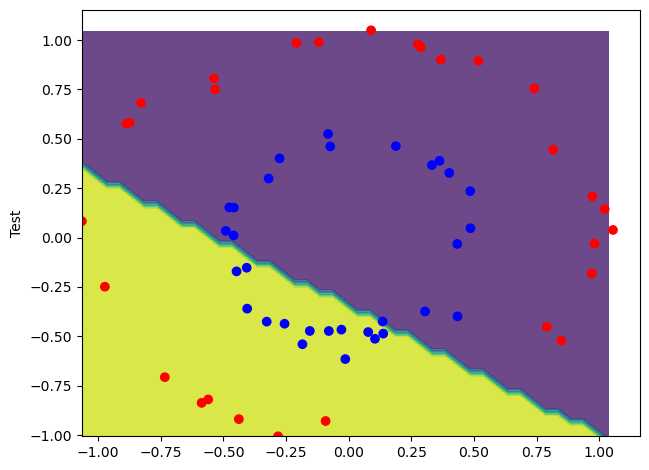

In [22]:

f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


In [24]:
# One-hot vectorizing our dependent response using Keras
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [25]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]


### Modeling Part 3

Implementing build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2.

Using the "relu" activation function for hidden layers, but since we have multiple output units, using the "softmax" activation for the final layer.

Using the SGD optimizer and "categorical_crossentropy" loss function to compile the model.

In [26]:
def build_classification_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    model.add(Dense(units=10, input_dim=2, activation='relu'))
    model.add(Dense(units=5, activation='relu'))
    model.add(Dense(units=2, activation='softmax'))

    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss="categorical_crossentropy", optimizer=sgd)

    return model

In [27]:
classification_model = build_classification_model()

In [28]:

classification_model.fit(X_train, y_train_vectorized, batch_size = 32, epochs= 500)

Epoch 1/500
8/8 [==============================] - 0s 540us/step - loss: 0.6945
Epoch 2/500
8/8 [==============================] - 0s 447us/step - loss: 0.6940
Epoch 3/500
8/8 [==============================] - 0s 552us/step - loss: 0.6933
Epoch 4/500
8/8 [==============================] - 0s 481us/step - loss: 0.6923
Epoch 5/500
8/8 [==============================] - 0s 440us/step - loss: 0.6914
Epoch 6/500
8/8 [==============================] - 0s 441us/step - loss: 0.6907
Epoch 7/500
8/8 [==============================] - 0s 368us/step - loss: 0.6895
Epoch 8/500
8/8 [==============================] - 0s 401us/step - loss: 0.6888
Epoch 9/500
8/8 [==============================] - 0s 468us/step - loss: 0.6879
Epoch 10/500
8/8 [==============================] - 0s 427us/step - loss: 0.6869
Epoch 11/500
8/8 [==============================] - 0s 399us/step - loss: 0.6861
Epoch 12/500
8/8 [==============================] - 0s 384us/step - loss: 0.6853
Epoch 13/500
8/8 [===================

8/8 [==============================] - 0s 382us/step - loss: 0.5815
Epoch 103/500
8/8 [==============================] - 0s 364us/step - loss: 0.5797
Epoch 104/500
8/8 [==============================] - 0s 379us/step - loss: 0.5777
Epoch 105/500
8/8 [==============================] - 0s 357us/step - loss: 0.5758
Epoch 106/500
8/8 [==============================] - 0s 367us/step - loss: 0.5738
Epoch 107/500
8/8 [==============================] - 0s 362us/step - loss: 0.5718
Epoch 108/500
8/8 [==============================] - 0s 354us/step - loss: 0.5698
Epoch 109/500
8/8 [==============================] - 0s 349us/step - loss: 0.5678
Epoch 110/500
8/8 [==============================] - 0s 371us/step - loss: 0.5657
Epoch 111/500
8/8 [==============================] - 0s 374us/step - loss: 0.5637
Epoch 112/500
8/8 [==============================] - 0s 355us/step - loss: 0.5616
Epoch 113/500
8/8 [==============================] - 0s 362us/step - loss: 0.5594
Epoch 114/500
8/8 [===========

8/8 [==============================] - 0s 341us/step - loss: 0.3188
Epoch 203/500
8/8 [==============================] - 0s 353us/step - loss: 0.3161
Epoch 204/500
8/8 [==============================] - 0s 346us/step - loss: 0.3135
Epoch 205/500
8/8 [==============================] - 0s 361us/step - loss: 0.3109
Epoch 206/500
8/8 [==============================] - 0s 365us/step - loss: 0.3082
Epoch 207/500
8/8 [==============================] - 0s 359us/step - loss: 0.3056
Epoch 208/500
8/8 [==============================] - 0s 359us/step - loss: 0.3031
Epoch 209/500
8/8 [==============================] - 0s 366us/step - loss: 0.3005
Epoch 210/500
8/8 [==============================] - 0s 362us/step - loss: 0.2979
Epoch 211/500
8/8 [==============================] - 0s 360us/step - loss: 0.2955
Epoch 212/500
8/8 [==============================] - 0s 350us/step - loss: 0.2929
Epoch 213/500
8/8 [==============================] - 0s 3ms/step - loss: 0.2904
Epoch 214/500
8/8 [=============

8/8 [==============================] - 0s 354us/step - loss: 0.1401
Epoch 303/500
8/8 [==============================] - 0s 348us/step - loss: 0.1390
Epoch 304/500
8/8 [==============================] - 0s 401us/step - loss: 0.1380
Epoch 305/500
8/8 [==============================] - 0s 451us/step - loss: 0.1369
Epoch 306/500
8/8 [==============================] - 0s 369us/step - loss: 0.1359
Epoch 307/500
8/8 [==============================] - 0s 360us/step - loss: 0.1349
Epoch 308/500
8/8 [==============================] - 0s 384us/step - loss: 0.1339
Epoch 309/500
8/8 [==============================] - 0s 379us/step - loss: 0.1330
Epoch 310/500
8/8 [==============================] - 0s 500us/step - loss: 0.1320
Epoch 311/500
8/8 [==============================] - 0s 364us/step - loss: 0.1311
Epoch 312/500
8/8 [==============================] - 0s 345us/step - loss: 0.1301
Epoch 313/500
8/8 [==============================] - 0s 394us/step - loss: 0.1291
Epoch 314/500
8/8 [===========

8/8 [==============================] - 0s 376us/step - loss: 0.0733
Epoch 403/500
8/8 [==============================] - 0s 370us/step - loss: 0.0729
Epoch 404/500
8/8 [==============================] - 0s 371us/step - loss: 0.0725
Epoch 405/500
8/8 [==============================] - 0s 352us/step - loss: 0.0721
Epoch 406/500
8/8 [==============================] - 0s 379us/step - loss: 0.0717
Epoch 407/500
8/8 [==============================] - 0s 358us/step - loss: 0.0713
Epoch 408/500
8/8 [==============================] - 0s 371us/step - loss: 0.0709
Epoch 409/500
8/8 [==============================] - 0s 357us/step - loss: 0.0706
Epoch 410/500
8/8 [==============================] - 0s 395us/step - loss: 0.0702
Epoch 411/500
8/8 [==============================] - 0s 375us/step - loss: 0.0698
Epoch 412/500
8/8 [==============================] - 0s 363us/step - loss: 0.0694
Epoch 413/500
8/8 [==============================] - 0s 372us/step - loss: 0.0690
Epoch 414/500
8/8 [===========

In [29]:
y_preds = classification_model.predict(X_test)
y_preds = (y_preds > 0.5).astype("int32")
y_preds_int = np.argmax(y_preds, axis=1)

2/2 [==============================] - 0s 1ms/step


In [30]:
def accuracy(y, y_preds):
    y_pred_classes = (y_preds > 0.5).astype("int32")
    accuracy = np.mean(y == y_pred_classes)
    return accuracy

In [31]:
 print(f'The accuracy is: {accuracy(y_test, y_preds_int)}')

The accuracy is: 1.0


57/57 [==============================] - 0s 283us/step


Text(22.097222222222214, 0.5, 'Test')

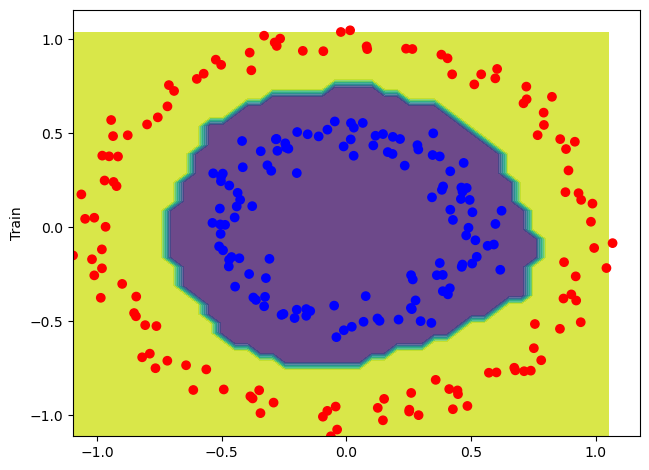

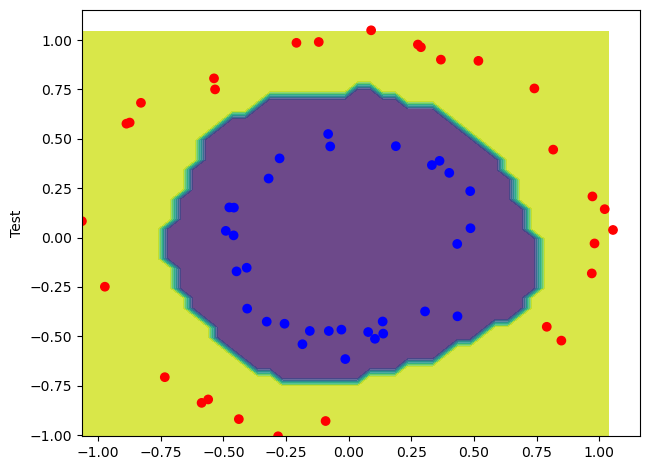

In [32]:
# And visualize how your model did
from utils import visualize_2d_classification

f, ax = visualize_2d_classification(classification_model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(classification_model, X_test, y_test)
ax.set_ylabel("Test")

We have successfully seperated the non-linear classes using Neural Networks